In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pixel = 1/plt.rcParams['figure.dpi'] # pixel in inches
import seaborn as sns
sns.set(color_codes=True)
import numpy as np
from sklearn.decomposition import PCA

In [2]:
df = pd.read_excel('O&G Equipment Data.xlsx') #df = df.set_index('Cycle')

/home/rodrigo/Desktop/masterthesis/myenv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


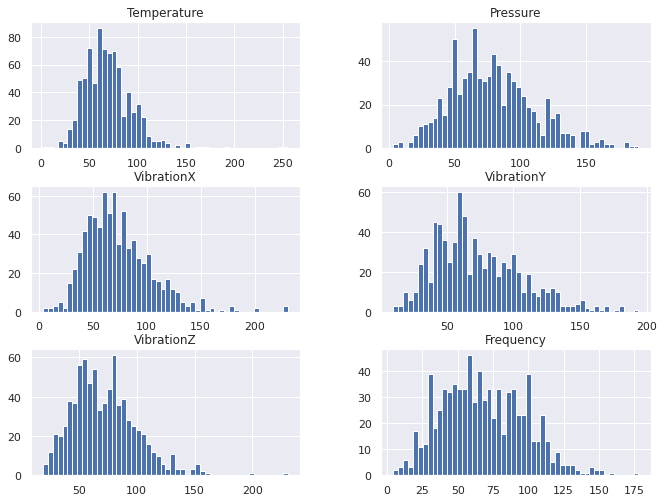

In [3]:
df[df.columns[3:9]].hist(figsize=(800*pixel, 600*pixel),bins=50)
plt.show()

In [4]:
def plot_Gauss_fit(f):
    plt.plot(figsize=(800/3*pixel, 200*pixel))
    sns.distplot(f,
                 bins = 50,
                 kde= True,
                 color = 'blue')

/home/rodrigo/Desktop/masterthesis/myenv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


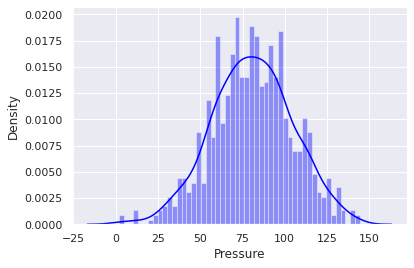

In [5]:
plot_Gauss_fit(np.log(df['Pressure'])**3)

/home/rodrigo/Desktop/masterthesis/myenv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


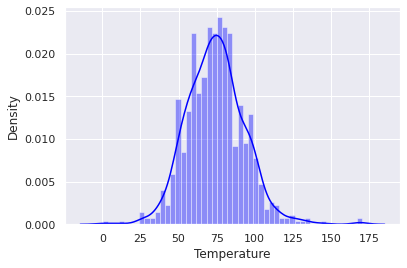

In [6]:
plot_Gauss_fit(np.log(df['Temperature'])**3)

/home/rodrigo/Desktop/masterthesis/myenv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


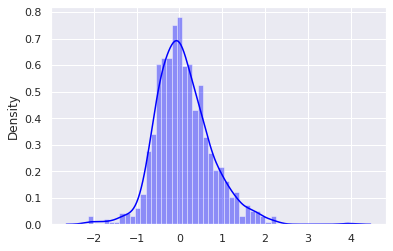

In [7]:
plot_Gauss_fit(np.log(df['VibrationX']/df['Frequency']))

/home/rodrigo/Desktop/masterthesis/myenv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


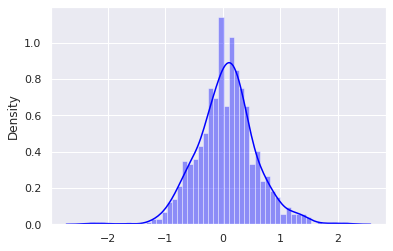

In [8]:
plot_Gauss_fit(np.log(df['VibrationY']/df['Frequency']))

/home/rodrigo/Desktop/masterthesis/myenv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


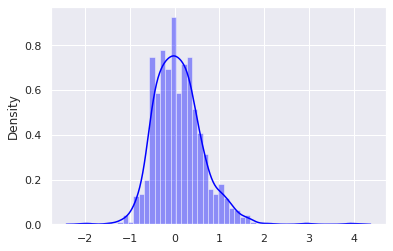

In [9]:
plot_Gauss_fit(np.log(df['VibrationZ']/df['Frequency']))

In [10]:
df['Temperature'] = np.log(df['Temperature'])**3
df['Pressure'] = np.log(df['Pressure'])**3
df['VibrationX'] = np.log(df['VibrationX']/df['Frequency'])
df['VibrationY'] = np.log(df['VibrationY']/df['Frequency'])
df['VibrationZ'] = np.log(df['VibrationZ']/df['Frequency'])

df = df[['Cycle', 'Preset_1', 'Preset_2', 'Temperature', 'Pressure', 'VibrationX', 'VibrationY', 'VibrationZ', 'Fail']]
df

,Cycle,Preset_1,Preset_2,Temperature,Pressure,VibrationX,VibrationY,VibrationZ,Fail
0,1,3,6,54.419280,57.692997,0.043087,0.376507,0.401405,False
1,2,2,4,69.310485,71.259807,0.029081,0.292768,0.299337,False
2,3,2,1,83.441786,86.305671,0.020151,0.193191,0.198579,False
3,4,2,3,83.939839,97.987715,0.421023,0.412826,0.390236,False
4,5,2,5,50.186479,61.476055,-0.412866,-0.051211,-0.236456,False
...,...,...,...,...,...,...,...,...,...
795,796,2,6,60.299449,96.536248,1.112302,0.689716,1.094016,True
796,797,1,4,59.855777,130.932482,0.000304,0.371217,-0.009072,True
797,798,1,4,83.983878,104.177010,-0.144262,0.747204,0.602789,True
798,799,2,8,83.682735,130.716197,-0.260142,0.751022,0.485730,True


In [35]:
dataset = sio.loadmat('anomalyData.mat')
X = dataset['X']
Xval = dataset['Xval']
yval = dataset['yval']

In [31]:
from sklearn.cross_validation import train_test_split
X = df[df.set_index('Cycle').columns[2:7]]
X = X.to_numpy()
yval = np.asarray(df.Fail.astype(int))

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [12]:
def estimateGaussian(X):
    n = np.size(X, 1)
    m = np.size(X, 0)
    mu = np.zeros((n, 1))
    sigma2 = np.zeros((n, 1))
    
    mu = np.reshape((1/m)*np.sum(X, 0), (1, n))
    sigma2 = np.reshape((1/m)*np.sum(np.power((X - mu),2), 0),(1, n))
    
    return mu, sigma2

In [13]:
mu, sigma2 = estimateGaussian(X)
print('mean: ',mu,' variance: ',sigma2)

mean:  [[7.43426714e+01 8.07516328e+01 9.81016089e-02 6.72118089e-02
  8.43012142e-02]]  variance:  [[3.56558595e+02 5.65678573e+02 4.20010113e-01 2.58456777e-01
  2.95171077e-01]]


In [14]:
def multivariateGaussian(X, mu, sigma2):
    n = np.size(sigma2, 1)
    m = np.size(sigma2, 0)
     
    if n == 1 or m == 1:        
        sigma2 = np.diag(sigma2[0, :])
     
    X = X - mu
    pi = np.pi
    det = np.linalg.det(sigma2)
    inv = np.linalg.inv(sigma2)
    val = np.reshape((-0.5)*np.sum(np.multiply((X@inv),X), 1),(np.size(X, 0), 1))

    p = np.power(2*pi, -n/2)*np.power(det, -0.5)*np.exp(val)
     
    return p

In [15]:
p = multivariateGaussian(X, mu, sigma2)

In [16]:
print(p.shape)

(800, 1)


In [18]:
import scipy.io as sio

dataset = sio.loadmat('anomalyData.mat')
X = dataset['X']
Xval = dataset['Xval']
yval = dataset['yval']

(800,)

In [17]:
pval = multivariateGaussian(Xval, mu, sigma2)

NameError: name 'Xval' is not defined

In [ ]:
def selectThreshHold(yval, pval):
    
    F1 = 0
    bestF1 = 0
    bestEpsilon = 0
    
    stepsize = (np.max(pval) - np.min(pval))/1000
        
    epsVec = np.arange(np.min(pval), np.max(pval), stepsize)
    noe = len(epsVec)
    
    for eps in range(noe):
        epsilon = epsVec[eps]
        pred = (pval < epsilon)
        prec, rec = 0,0
        tp,fp,fn = 0,0,0
        
        try:
            for i in range(np.size(pval,0)):
                if pred[i] == 1 and yval[i] == 1:
                    tp+=1
                elif pred[i] == 1 and yval[i] == 0:
                    fp+=1
                elif pred[i] == 0 and yval[i] == 1:
                    fn+=1
            prec = tp/(tp + fp)
            rec = tp/(tp + fn)
            F1 = 2*prec*rec/(prec + rec)
            if F1 > bestF1:
                bestF1 = F1
                bestEpsilon = epsilon
        except ZeroDivisionError:
            print('Warning dividing by zero!!')          
       
    return bestF1, bestEpsilon

In [ ]:
F1, epsilon = selectThreshHold(yval, pval)
print('Epsilon and F1 are:',epsilon, F1)

In [ ]:
outl = (p < epsilon)

In [ ]:
def findIndices(binVec):
    l = []
    for i in range(len(binVec)):
        if binVec[i] == 1:
            l.append(i)
    return l

In [ ]:
listOfOutliers = findIndices(outl)
count_outliers = len(listOfOutliers)
print('\n\nNumber of outliers:', count_outliers)
print('\n',listOfOutliers)